In [ ]:
print('hello world')

hello world


##Project description

**Background:** Gene expression can be approximated by measuring the level of mRNA, where higher mRNA levels are typically indicative of higher gene expression. mRNA levels can be measured by RNA sequencing (or more specifically, see 8:10-10:10 [cDNA](https://https://www.youtube.com/watch?v=-kTcFZxP6kM&t=663s)) by [short-read sequencing](https://www.youtube.com/watch?v=fCd6B5HRaZ8&t=243s), which can reveal how highly each gene is expressed relative to other genes in an organism. 

Since proteins that work together in e.g., protein complex, need to be all present in correct abundances to form a functioning complex, mRNA levels of interacting proteins tend to be [correlated](https://en.wikipedia.org/wiki/Correlation_and_dependence), i.e., expressed in the same ratios throughout the life of an organism. Genes whose mRNAs are correlated are [co-expressed](https://en.wikipedia.org/wiki/Gene_co-expression_network). Co-expression analysis is thus a powerful method to identify functionally related genes.

The overarching aim of this project is to identify novel photosynthetic genes in your assigned organism. To do this, you will use gene expression data to perform a co-expression analysis and identify novel components of the photosynthesis complex. These genes can then be further studied by others to improve photosynthesis, and increase crop yield.

**Do not import any other modules and packages, than the ones already specified by Marek. Yes, other modules can simplify some of the tasks, but your job is to demonstrate that you can use very basic Python to solve these challenges.**


*To those of you interested in bioinformatics, we will also offer an internship in Marek's lab at the end of the course.*



# Week 9 - Annotating RNA-sequencing data

Your group is given a zip file containing two files:

* _runtable contains the annotations of the RNA-seq samples used in your expression matrix
* The other file contains the actual expression matrix (i.e., a table of numbers). The rows represent genes, while the columns represent RNA-seq samples

**Prerequisites:** None

**Tasks:** This week's task is:
* Annotate all samples within the _runtable file

Load the runtable file into excel as a comma-separated file (google the way to do this). You will most likely see something like this:

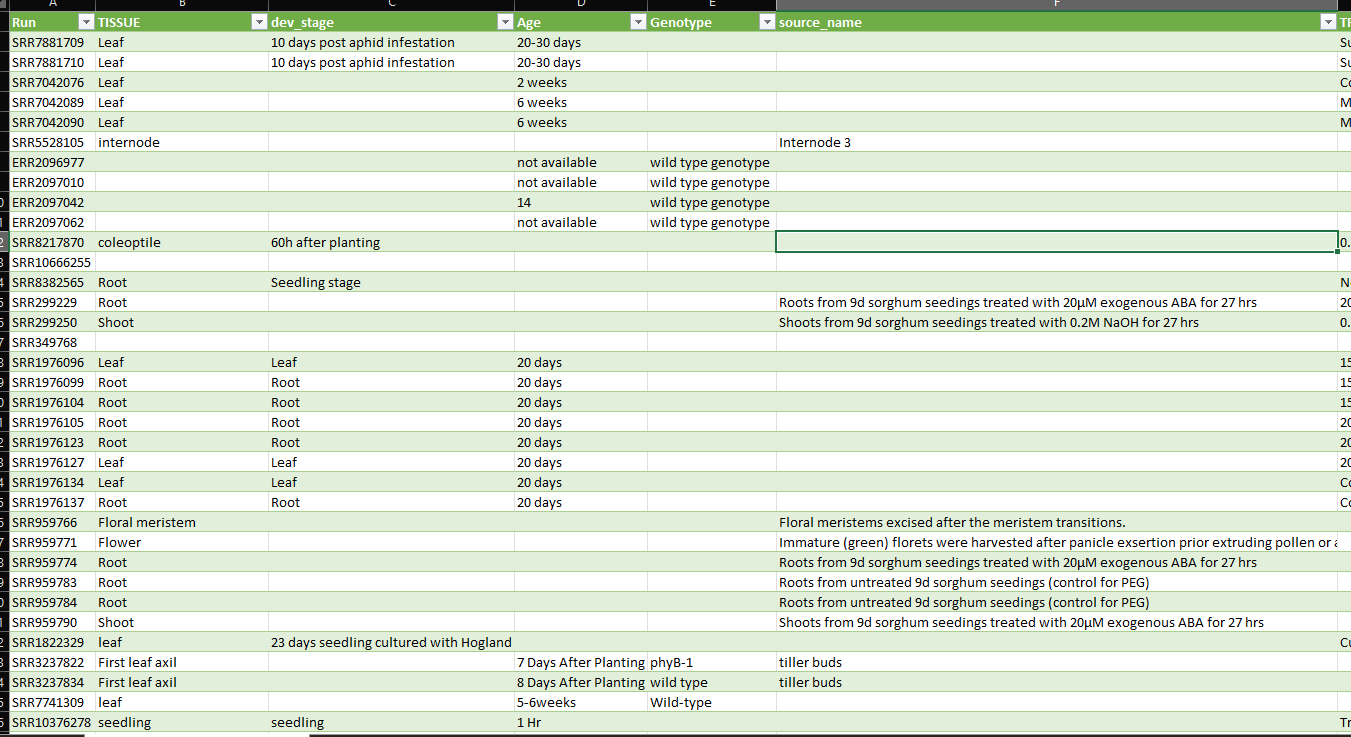

In the first column, you see the ID of the RNA-seq sample, and in further columns you will see other info. You are looking for the info containing the description of the samples. As you can see, the information is often scattered, without consistency or even sometimes missing. This is because the different groups submitting the data to a repository are often not following guidelines, or are outright lazy. 

To make use of the data, we have to annotate the samples in a consistent manner. This is where you come in. 
Your task is to go over each row in the table and produce 'sample_annotation.txt' file for your species. More specifically, you have to match the fuzzy annotations in runinfo to the Plant Ontology (PO) annotations, found in **PlantOntologyStudents.txt** file. PO provides a structured vocabulary describing plant anatomy (you can read more here: https://www.ebi.ac.uk/ols/ontologies/po).

To make the annotation, study the runinfo file, understand the anatomy of your organism and what the different PO terms represent.

For example, the annotations of the first few samples above should be:





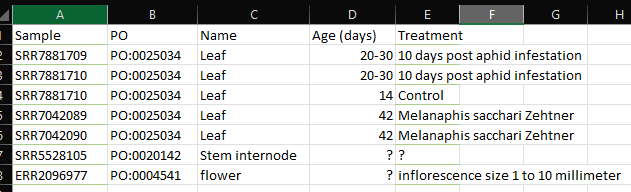

##Task 1 - Annotate the RNA-seq experiments

There should be ~500 samples in your runinfo, and you need them by week 12, so you have three weeks to get it done. Divide the annotations fairly among your group and grind through the table. 

The file resulting file should contain 5 columns:
1. The RNA-seq sample ID, that **must also be found in the expression matrix**
2. The PO term
3. PO term description, from the PlantOntologyStudents.txt file
4. Age of the plant
5. Any additional info that you found, e.g., age, treatment, mutation.

Save the result as X_sample_annotation.txt where X is your group ID. Send the file to Marek together with your final report. Note: do not use programming to solve this... Only humans can reliably do the annotation (for now).

# Week 10 - Identifying the most co-expressed photosynthesis gene

**Prerequisites**: Working knowledge of strings, lists, loops, dictionaries and reading/writing files.

**Tasks**: You have three tasks this week. 
1. Retrieve all genes involved in photosynthesis. 
2. Construct a co-expression network that shows which of these genes have similar expression profiles.
3. Identify a gene with the most connections (i.e., most co-expressed to) to the other photosynthesis genes.

It is time to check whether your expression matrix can be used to predict gene function. This is called a '[sanity check](https://en.wikipedia.org/wiki/Sanity_check)', where you check whether your script and data can produce an **expected outcome**. After analyzing co-expression networks from tens of different organisms, you will realize that in all of them the photosynthesis genes are co-expressed. If they are not, then something is clearly wrong, and two possibilities exist:

1. You have made an error in your network-generating script
2. The gene expression data for your organism is of poor quality. Consult the instructor. 


##Task 1 - Retrieve all genes involved in photosynthesis.

To retrieve all genes involved in photosynthesis, open the _mapman.txt file of your species to view MapMan ontology annotations. 

Which MapMan bin represents photosynthesis? Which genes are involved in photosynthesis? 

Now, write a script to parse the mapman file and add all photosynthesis-related genes to the genes_of_interest list.

First, mount your google drive and find the path to your files in the 'Files' menu on the right.

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Your solution should have 6-10 lines of code

In [ ]:
genes_of_interest = []
#Write your solution below
with open('/content/gdrive/MyDrive/NTU/BS1009 INTRO TO COMPUTATIONAL THINKING/BS1009 group project/Sorghum_bicolor_mapman (fixed).txt', "r") as f:
  lines = f.readlines()
  for line in lines:

      if line[-1] == '\n':
          line = line[:-1]

      line_list = line.split("\t")
      
      if len(line_list) > 2:
        
        identifier = line_list[2]
        name_of_gene = line_list[1]
        
        if "PHOTOSYNTHESIS" in name_of_gene.upper():
          if identifier not in genes_of_interest and len(identifier)!= 0:
            genes_of_interest.append(identifier)

print(genes_of_interest[0:5])
print(len(genes_of_interest))


['sobic.003g209800', 'sobic.002g339200', 'sobic.002g289100', 'sobic.002g288300', 'sobic.001g177000']
321


Now that you have the relevant genes, retrieve their expression profiles from the expression matrix. To this end, use a dictionary called id_to_exp = {}. Keys should be gene IDs (string), while values should be gene expression values (float). For example, the dictionary should look like:

id_to_exp = {'geneA':[4.7,2.2,5.4,6.8], 'geneB':[1.1, 2.5, 5.4, 6.1]}

Your solution should have 6-10 lines of code

In [ ]:
id_to_exp = {}

#Write your solution below
with open('/content/gdrive/MyDrive/NTU/BS1009 INTRO TO COMPUTATIONAL THINKING/BS1009 group project/Sorghum_bicolor-4558_5.txt', "r") as f:
    for line in f:
 
        line_list = line.split("\t")

        for gene in genes_of_interest:

          if gene.upper() == line_list[0].upper():

            if gene not in id_to_exp:
              id_to_exp[gene] = []
              
            for rna in line_list[1:]:
              id_to_exp[gene].append(float(rna))

print(id_to_exp)
print(len(id_to_exp))

{'sobic.001g283000': [0.251692, 0.321533, 1.48048, 0.81906, 0.297803, 1.53048, 2.50365, 0.460771, 0.236266, 5.19298, 1.52421, 0.776104, 0.580786, 4.60547, 0.61058, 0.431953, 0.330587, 0.240055, 0.887499, 0.880801, 0.237942, 0.816216, 1.94509, 0.583476, 0.424059, 0.471622, 0.395874, 0.88167, 2.81441, 5.71912, 0.868591, 0.0, 0.277989, 0.291177, 0.488348, 1.07204, 0.805193, 1.84674, 1.1021, 0.910544, 0.530649, 6.63301, 0.580272, 0.96218, 0.264076, 0.1124, 0.698293, 2.07116, 0.367413, 0.559823, 3.86965, 2.512, 1.16078, 0.866591, 4.86566, 1.72466, 0.148407, 0.738937, 1.24885, 1.18182, 2.21245, 0.623809, 1.66393, 0.322606, 0.945263, 0.217474, 4.36831, 0.92071, 0.266857, 1.01675, 2.20609, 0.0539092, 1.19219, 0.60464, 3.75536, 0.0, 6.44748, 3.2865, 0.0, 0.52623, 0.859886, 4.26428, 0.895981, 0.203319, 0.952556, 0.0, 10.2563, 0.119088, 1.77563, 1.13774, 0.485022, 1.25808, 4.38853, 0.522731, 1.34102, 1.84559, 2.09351, 0.0, 3.08224, 0.324568, 0.867395, 1.6488, 9.32406, 2.5657, 0.255389, 1.13764, 0

##Task 2 - Construct a co-expression network of the photosynthetic genes

Now that you have a list and expression of relevant genes, it is time to construct a co-expression network. To this end, you need to compare all possible pairs of genes and decide which of these pairs have similar expression profiles. To achieve this, you should use [Pearson Correlation Coefficient](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) (PCC, also denoted by r), which can be used to calculate the similarities between two vectors (lists) of numbers, such as gene expression values. R ranges from -1 (two genes are perfectly anti-correlated), through 0 (two genes are not correlated) to 1 (two genes are perfrectly correlated). Thus, genes with r value close to 1 are correlated, indicating that they are co-expressed. 

In [ ]:
from scipy import stats #imports the stats module that contains many statistical methods

#Example 1.
r, p = stats.pearsonr([1, 2, 3, 4, 5], [10, 20, 30, 40, 50]) #two expression vectors are perfectly correlated
print('The first r-value is ', r)

#Example 2.
r, p = stats.pearsonr([1, 2, 3, 4, 5], [10, 50, 20, 40, 30]) #two exoression vectors are poorly correlated
print('The second r-value is ', r)

#Example 2.
r, p = stats.pearsonr([1, 2, 3, 4, 5], [5, 4, 3, 2, 1]) #twi exoression vectors are perfectly anti-correlated
print('The third r-value is ', r)

The first r-value is  1.0
The second r-value is  0.30000000000000004
The third r-value is  -1.0


To construct the co-expression network, calculate r between **all possible pairs of genes**, and use high cut-off (e.g., r>0.9, r>0.8 or r>0.7) to indicate which pairs of genes are co-expressed. Add the pairs of co-expressed genes to network list. For example, if genes a and b, and genes b and c are co-expressed, your list should look like:

network = [['a','b'],['b','c']]

Adjust r cut-off to obtain ~100 pairs of co-expressed genes. Do the number of pairs increase or decrease when you increase r cut-off? Why?

You might get a warning 'An input array is constant; the correlation coefficient is not defined.   warnings.warn(PearsonRConstantInputWarning())'. What does it mean and why are you getting this error?

Your solution should have 6-10 lines of code

In [ ]:
from scipy import stats

network = []
#Write your solution below
for i in range(len(genes_of_interest)):
    for j in range(i+1, len(genes_of_interest)):
        gene1 = genes_of_interest[i]
        gene2 = genes_of_interest[j]
        r,p = stats.pearsonr(id_to_exp[gene1], id_to_exp[gene2])

        if r > 0.91:
            network.append([gene1, gene2])
            
print(network)
print(len(network))

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


[['sobic.001g177000', 'sobic.002g338000'], ['sobic.001g177000', 'sobic.010g241000'], ['sobic.001g177000', 'sobic.004g056900'], ['sobic.001g177000', 'sobic.002g352100'], ['sobic.001g177000', 'sobic.010g189300'], ['sobic.001g177000', 'sobic.007g136900'], ['sobic.001g177000', 'sobic.001g070500'], ['sobic.001g177000', 'sobic.003g052500'], ['sobic.002g338000', 'sobic.010g241000'], ['sobic.002g338000', 'sobic.004g056900'], ['sobic.002g338000', 'sobic.003g052500'], ['sobic.002g338000', 'sobic.006g105900'], ['sobic.003g169100', 'sobic.008g160300'], ['sobic.010g241000', 'sobic.002g030200'], ['sobic.010g241000', 'sobic.004g056900'], ['sobic.010g241000', 'sobic.010g189300'], ['sobic.010g241000', 'sobic.001g046900'], ['sobic.010g241000', 'sobic.002g119500'], ['sobic.010g241000', 'sobic.001g070500'], ['sobic.010g241000', 'sobic.003g052500'], ['sobic.010g241000', 'sobic.002g316700'], ['sobic.010g241000', 'sobic.004g235200'], ['sobic.010g241000', 'sobic.006g105900'], ['sobic.002g030200', 'sobic.002g3

To visualize your co-expression network, run the cell below. An interactive network should appear.

In [ ]:
#@markdown Run this cell to visualize the network. If you change the network, rerun this cell. 


import IPython
from IPython.display import display, HTML

def style_one_node(GeneID, shape, color):
  '''Returns the string of html css style sheet to be added to the index html file'''
  node_styling='''\
              {
              selector: 'node[id="GENEID"]',
              style: {
                  shape: 'ENTER_SHAPE',
                  'background-color': 'ENTER_COLOR',
                  }
              },
  '''
  node_styling = node_styling.replace('GENEID', GeneID)
  node_styling = node_styling.replace('ENTER_SHAPE', shape)
  node_styling = node_styling.replace('ENTER_COLOR', color)

  return node_styling

def generate_html_index(list_of_edges):
  '''Returns a string of a html with javascript code to render the network from list_of_nodes and list_of_edges. list_of_nodes = ['a','b','c'], list_of_edges = [['a','b'],['b','c']]'''
  front_html = '''\
  <!doctype html>
  <html>
    <head>
        <title>Network on Cytoscape</title>
        <script src='https://cdnjs.cloudflare.com/ajax/libs/cytoscape/3.9.4/cytoscape.min.js'></script>
    </head>

    <style>
        #cy {
            width: 1000px;
            height: 950px;
            }
    </style>

    <body style="background-color:rgb(194, 229, 243);">
      <div><p>Click to download as: <br><a id="pngimage" href="#" download="NetworkImage.png">Image</a> | <a id="cyjson" href="#" download="NetworkImage.json">JSON</a></p></div>
      <div id="cy"></div>
      <script>
        var cy = cytoscape({
          container: document.getElementById('cy'),
  '''


  mid_html = '''\
          elements: {
              nodes: [\n
  '''

  list_of_nodes = []
  for i in list_of_edges:
      list_of_nodes +=i
  list_of_nodes = list(set(list_of_nodes)) 

  #get nodes
  # { data: { id: 'a', node_type: 'q/t', color: 'x', shape: 'z' } },
  for j in list_of_nodes:
      shape, color = "triangle", "Silver"
      ntype = "linked"
      new_node = "\t"*5 + "{\n" + "\t"*6 + "data: {\n" +\
        "\t"*6 + "id: \'" + j + "\',\n" +\
        "\t"*6 + "node_type: \'" + ntype + "\',\n" +\
        "\t"*6 + "color: \'" + color + "\',\n" +\
        "\t"*6 + "shape: \'" + shape + "\'\n" + "\t"*6 + "}\n" + "\t"*5 + "}"
      if list_of_nodes.index(j) != len(list_of_nodes)-1:
        new_node += ",\n"
      else:
        new_node += "\n\t\t\t\t],\n"
      mid_html += new_node

  mid2_html = '''\
              edges: [\n
  '''
  mid_html += mid2_html
  #get edges
  for i in range(len(list_of_edges)):
    ID = list_of_edges[i][0] + " | " + list_of_edges[i][1]
    source = list_of_edges[i][0]
    target = list_of_edges[i][1]
    new_edge = "\t"*5 + "{\n" + "\t"*6 + "data: {\n" +\
      "\t"*7 + "id: \'" + ID + "\',\n" +\
      "\t"*7 + "source: \'" + source + "\',\n" +\
      "\t"*7 + "target: \'" + target + "\'\n" + "\t"*6 + "}\n" + "\t"*5 + "}"
    if i != (len(list_of_edges)-1):
      new_edge += ",\n"
    else:
      new_edge = new_edge + "\n\t\t\t\t]\n"
    mid_html += new_edge

  back_html = '''\
            },
            style: [
              { 
              selector: "node",
              style: {
                  shape: 'data(shape)',
                  'height': '3px',
                  'width': '3px',
                  'background-color': 'data(color)',
                  label: 'data(id)',
                  'border-style':'solid',
                  'border-color':'black',
                  'border-width':'0.1px',
                  'font-size': 1.2,
                  'text-margin-y':'-0.4px',
                  'text-outline-color':'white',
                  'text-outline-width':'0.15px',
                  'text-outline-opacity':0.8
                  }
              },
              {
              selector: 'edge',
              style: {
                  'width': '0.1px',
                  'line-style':'solid',
                  'line-fill':'solid',
                  'background-color': '#F5F5F5',
                  'opacity':0.4
                  }
              },
              {
              selector:'core',
              style: {
                  'outside-texture-bg-color':'white',
                  'outside-texture-bg-opacity':1
                  }
              },
            ],
            layout: {
              name: 'cose',
              animateThreshold: 1,
              nodeOverlap: 100,
              gravity: 400,
              componentSpacing: 100,
              edgeElasticity: 100,
              minTemp: 1,
              initialTemp: 1000,
              stop: function() {
                  //generate PNG image to display from "id = pngimage"
                  var png64 = cy.png({bg:'white'});
                  document.getElementById('pngimage').setAttribute('href', png64);
                  //generate JSON to download for id = cyjson
                  var jsonc = JSON.stringify(cy.json(), null, "\\t");
                  document.getElementById('cyjson').setAttribute('href', 'data:text/plain;charset=utf-8,' + encodeURIComponent(jsonc));
              }
            }
        });

      </script>
    </body>
  </html>
  '''

  index_html = front_html + mid_html + back_html
  return index_html

def save_index_file(index_html, guide_gene):
  '''Writes the html/js string into a html file and return the path to the new html file'''
  network_html_path = "Network_index_" + guide_gene + '.html'
  with open(network_html_path, 'w+') as index_file:
    index_file.write(index_html)
  print("HTML file saved in: " + network_html_path+ "\n")
  return network_html_path

##Run this cell to see an example of the network. Do not alter this code.
network_z = generate_html_index(network)
index_html = network_z.replace('NetworkImage', 'Genes') #Specify Name of png file to be downloaded based on guide gene
network_html_path = save_index_file(index_html, 'Genes')
IPython.display.HTML(filename = network_html_path)

HTML file saved in: Network_index_Genes.html



In [ ]:
ic

## Task 3: Which gene is mostly co-expressed with the other genes? 

Now that you have the network, you can identify a gene that has the highest number of connections to other genes. Genes with high node degree (number of connections) are often playing a central role in a given biological process. Thus, by identifying this gene, you will likely identify the most important component of photosynthesis.

Write a script that takes the network file (in form of [['a','c'], ['a','b'],['a','d']]), and returns the ID of the most highly connected gene (in this example 'a'). In case of a tie, take the first most highly connected gene that you found. Write down the ID of the gene, as you will need it next week.

Note down the ID of this gene, as you will need it next week.

Your solution should have ~20 lines of code

In [ ]:
# Write your solution below
count = 1
degrees = {}
for i in network:
    for gene in i:
        if gene not in degrees:
            degrees[gene] = 0
        else:
          degrees[gene] += 1

highest_key = ''
highest_value = float()

for key, value in degrees.items():
    if value > highest_value:
        highest_key = key
        highest_value = value

print(highest_key, highest_value)

sobic.010g241000 11


#Week 11 - Identify novel components of photosystem

**Prerequisites**: You have constructed a co-expression network and identified a gene with the highest node degree. You should have a working knowledge of strings, lists, dictionaries and reading files.

You have two tasks this week:
1. Identify **top 50 genes** co-expressed with the gene that you found last week. Use R value to identify the top 50 genes.
2. Discuss the function of the **top 50 genes** found in the above list. What do they do, and does their function fit with photosynthesis?



##Task 1: Identify genes co-expressed with your query gene
First, you need to retrieve gene annotations (descriptions) from the mapman file. Open the file in Excel and decide on how to extract functional information from the file. Then, create a gene_to_anno dictionary, which should look like:

gene_to_anno = {'geneA':'protein kinase','geneB':'ribosomal protein'}

Your solution should have ~5-10 lines of code

In [ ]:
gene_to_anno = {}

#Write your solution below.
with open('/content/gdrive/MyDrive/NTU/BS1009 INTRO TO COMPUTATIONAL THINKING/BS1009 group project/Sorghum_bicolor_mapman (fixed).txt', "r") as f:
  lines = f.readlines()
  for line in lines:

    line_list = line.split("\t")
    if len(line_list)<3 or 'sobic' not in line_list[2]:
      continue
    gene = line_list[2]
    info = line_list[3]
    
    if gene in genes_of_interest:
      gene_to_anno[gene]= info


print(gene_to_anno)
print(len(gene_to_anno))

 

{'sobic.003g209800': 'component LHCb1/2/3 of LHC-II complex', 'sobic.002g339200': 'component LHCb1/2/3 of LHC-II complex', 'sobic.002g289100': 'component LHCb1/2/3 of LHC-II complex', 'sobic.002g288300': 'component LHCb1/2/3 of LHC-II complex', 'sobic.001g177000': 'component LHCb1/2/3 of LHC-II complex', 'sobic.003g209900': 'component LHCb1/2/3 of LHC-II complex', 'sobic.009g234600': 'component LHCb1/2/3 of LHC-II complex', 'sobic.002g338000': 'component LHCb4 of LHC-II complex', 'sobic.005g087000': 'component LHCb5 of LHC-II complex', 'sobic.006g264201': 'component LHCb6 of LHC-II complex', 'sobic.002g159100': 'component LHCq of LHC-II complex', 'sobic.003g169100': 'component PsbB/CP47 of PS-II reaction center complex', 'sobic.009g123100': 'component PsbI of PS-II reaction center complex', 'sobic.010g241000': 'component PsbO/OEC33 of PS-II oxygen-evolving center', 'sobic.002g030200': 'component PsbP of PS-II oxygen-evolving center', 'sobic.002g329600': 'component PsbQ of PS-II oxygen-

Now that you have the annotations, load in the gene expression matrix. Then, calculate the r value between the most_connected gene and **all genes in the genome**. Finally, display the top 50 genes that are most co-expressed with the most_connected gene. 

The output should look something like this:

R | Gene ID | Description
--- | --- | ---
1 | most_connected | Photosystem gene X
0.95 | ? | ?
0.94 | ? | ?
0.87 | ? | ?
0.85 | ? | ?
0.82 | ? | ?
... | ... | ...

Expect ~15-30 lines of code

In [ ]:
gene_of_interest = 'sobic.010g241000' #the ID of the gene from week 10

#Write your solution below


In [ ]:
all_genes=[]
all_gene_exp={}
all_network=[]
sorted_all_network=[['R','Gene ID','Description']]

#makes list of all genes
with open('/content/gdrive/MyDrive/NTU/BS1009 INTRO TO COMPUTATIONAL THINKING/BS1009 group project/Sorghum_bicolor_mapman (fixed).txt', "r") as f:
  lines = f.readlines()
  for line in lines:
    line_list = line.split("\t")

    if len(line_list) < 3 or 'sobic' not in  line_list[2]:
      continue
    
    all_genes.append(line_list[2])

In [ ]:
#makes dict of all genes and their expression values
with open('/content/gdrive/MyDrive/NTU/BS1009 INTRO TO COMPUTATIONAL THINKING/BS1009 group project/Sorghum_bicolor-4558_5 (fixed).txt', "r") as f:
    for line in f:
 
        line_list = line.split("\t")

        for gene in all_genes:
          if gene.upper() == line_list[0].upper():
                         
            all_gene_exp[gene] = [float(rna) for rna in line_list[1:]]

#cannot run print statement without crashing, dictionaries cannot be sliced normally
print(len(all_gene_exp))

34128


In [ ]:
#makes pairwise comparison of gene of interest and all genes
#make a list of all genes above r = 0.91
gene_of_interest_exp = all_gene_exp[gene_of_interest]
for i in range(len(all_genes)):
  gene = all_genes[i]
  r,p = stats.pearsonr(gene_of_interest_exp, all_gene_exp[gene])
  if r > 0.8:
    all_network.append([r, gene])
print(all_network[:10])
print(len(all_network))

[[0.8526984591034449, 'sobic.002g288300'], [0.9248474815824904, 'sobic.001g177000'], [0.8115880852539281, 'sobic.003g209900'], [0.9267603709714294, 'sobic.002g338000'], [0.8200630608653953, 'sobic.005g087000'], [0.9999999999999998, 'sobic.010g241000'], [0.9101750694879538, 'sobic.002g030200'], [0.8239948279747361, 'sobic.002g329600'], [0.8241983813466057, 'sobic.007g071500'], [0.8341806446128524, 'sobic.001g382100']]
75


In [ ]:
#add in info of genes from mapman file

with open('/content/gdrive/MyDrive/NTU/BS1009 INTRO TO COMPUTATIONAL THINKING/BS1009 group project/Sorghum_bicolor_mapman (fixed).txt', "r") as f:
  lines = f.readlines()

  for line in lines:
    line_list = line.split("\t")

    if len(line_list)<3 or 'sobic' not in line_list[2]:
      continue
    gene = line_list[2]
    info = line_list[3]

    for i in range(len(all_network)):
      if gene in all_network[i][1]:
        all_network[i].append(info)
  
  print(all_network[:10])

[[0.8526984591034449, 'sobic.002g288300', 'component LHCb1/2/3 of LHC-II complex'], [0.9248474815824904, 'sobic.001g177000', 'component LHCb1/2/3 of LHC-II complex'], [0.8115880852539281, 'sobic.003g209900', 'component LHCb1/2/3 of LHC-II complex'], [0.9267603709714294, 'sobic.002g338000', 'component LHCb4 of LHC-II complex'], [0.8200630608653953, 'sobic.005g087000', 'component LHCb5 of LHC-II complex'], [0.9999999999999998, 'sobic.010g241000', 'component PsbO/OEC33 of PS-II oxygen-evolving center'], [0.9101750694879538, 'sobic.002g030200', 'component PsbP of PS-II oxygen-evolving center'], [0.8239948279747361, 'sobic.002g329600', 'component PsbQ of PS-II oxygen-evolving center'], [0.8241983813466057, 'sobic.007g071500', 'component PsbR of PS-II complex'], [0.8341806446128524, 'sobic.001g382100', 'protein involved in PS-II assembly (Psb27)']]


In [ ]:
#arrange all lists in order of r value, select top 50

def quicksort(list):
  return list[0]

all_network.sort(key = quicksort)
all_network = all_network[-1:-51:-1]
print(all_network)

[[0.9999999999999998, 'sobic.010g241000', 'component PsbO/OEC33 of PS-II oxygen-evolving center'], [0.9519118236005291, 'sobic.001g070500', 'component PsaF of PS-I complex'], [0.9489782347425428, 'sobic.003g052500', 'component PsaL of PS-I complex'], [0.9410374355399723, 'sobic.001g046900', 'component PsaD of PS-I complex'], [0.9267603709714294, 'sobic.002g338000', 'component LHCb4 of LHC-II complex'], [0.9248474815824904, 'sobic.001g177000', 'component LHCb1/2/3 of LHC-II complex'], [0.9244527507599423, 'sobic.002g119500', 'component PsaE of PS-I complex'], [0.9241187202283992, 'sobic.010g189300', 'component LHCa3 of LHC-I complex'], [0.9175248345175276, 'sobic.004g056900', 'component LHCa1 of LHC-I complex'], [0.9163754473147494, 'sobic.002g316700', 'subunit gamma of peripheral CF1 subcomplex of ATP synthase complex'], [0.913716188289522, 'sobic.004g235200', 'subunit delta of peripheral CF1 subcomplex of ATP synthase complex'], [0.9111432912417936, 'sobic.006g105900', 'glyceraldehyde

In [ ]:
#make the tsv, the file will automatically be cleared each time in the 'w' mode

with open('/content/gdrive/MyDrive/NTU/BS1009 INTRO TO COMPUTATIONAL THINKING/BS1009 group project/output.txt', 'w') as file:
    for row in all_network:
        file.write('\t'.join(str(cell) for cell in row) + '\n')

In [ ]:
#checking values
r,p = stats.pearsonr(gene_of_interest_exp, all_gene_exp[gene])
print(r)

-0.03153158892141275


TAs: the list should contain various components of photosystem, primary metabolism or other chloroplast-related genes.
There are going to be some genes annotated as 'no hits'. These represent novel proteins which are perhaps undiscovered components of photosystems. Exciting!

##Task 2: Analyzing the list
Are the genes above involved in photosynthesis? What is the function of some of the unexpected genes? Can you explain their presence in your list? Discuss this in the final report!

#Week 12 - Plotting expression profile of your photosynthetic gene
An expression profile of a gene can tell you a great deal about it's function. Plotting in Python can be easy, but we have not covered it during the class. However, you can use the code below to make a plot with Seaborn package. Seaborn (https://seaborn.pydata.org/examples/index.html) is a python package that provides many fancy ways to visualize the data.

You will use barplots to indicate the average expression of your gene in the different organs, and use standard deviation to indicate the spread of the data. 

The example below plots the expression profile of an imaginary gene with nine expression values: 3 in leaves, 3 in roots and 3 in seeds. 


<ipython-input-18-60c9043c34b5>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  g = sns.catplot(data=df, kind="bar", x="Organs", y="Expression", ci="sd") #the dataframe is used to plot barplots, using standard deviation to indicate confidence interval


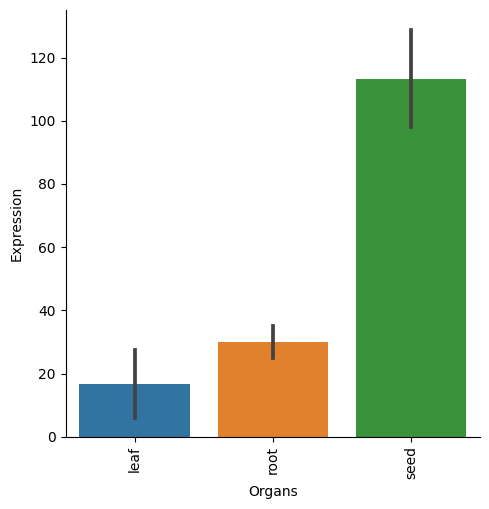

In [ ]:
import pandas as pd
import seaborn as sns

expression = [10,11,29,30,35,25, 100,110,130] #expression vector
organs = ['leaf','leaf','leaf','root','root','root','seed','seed','seed'] #annotation list

df = pd.DataFrame({'Expression':expression, 'Organs':organs}) #The data is entered into a dataframe (google what it is if you are interested)

g = sns.catplot(data=df, kind="bar", x="Organs", y="Expression", ci="sd") #the dataframe is used to plot barplots, using standard deviation to indicate confidence interval
g.set_xticklabels(rotation=90)

Using the annotations that you have generated during the first week, retrieve the sample annotations and their corresponding expression values of your gene. Then, like in the example above, plot the values.

How is your gene expressed? Does the expression profile make sense from a biological point of view? 

Expect to write ~30-40 lines of code

In [ ]:
import pandas as pd
import seaborn as sns

gene_of_interest = 'sobic.010g241000'

#Your solution below

expression = gene_of_interest_exp
organs = []
rna_to_po = {}
po_to_parts = {}
database_err={}

#make dict of all rna in manual anno
with open('/content/gdrive/MyDrive/NTU/BS1009 INTRO TO COMPUTATIONAL THINKING/BS1009 group project/Manual anno.txt', "r", encoding="latin1") as f:
    for line in f:
        line_list = line.split("\t")

        if len(line)>1 and line_list[1] != '':
          rna_to_po[line_list[0]] = line_list[1]

#make list of all rna in order
with open('/content/gdrive/MyDrive/NTU/BS1009 INTRO TO COMPUTATIONAL THINKING/BS1009 group project/Sorghum_bicolor-4558_5 (fixed).txt', "r") as f:
    rna_list = [f.readline().split("\t")]

rna_list = rna_list[0][1:]
print('This is rna list in big file ',rna_list)
print('This is row containing gene of interest ',expression)
print('Check if length in big file (', len(rna_list), ') is equal to length of row containing gene of interest (', len(expression),')')

#make dict of all parts in po
with open('/content/gdrive/MyDrive/NTU/BS1009 INTRO TO COMPUTATIONAL THINKING/BS1009 group project/PlantOntologyfixed.txt', "r") as f:
  for line in f:
    line_list = line.split("\t")
    po_to_parts[line_list[0]] = line_list[1]

#according to list of rna in manual anno, make list of parts corresponding to rna

for rna in rna_list:
  if rna not in rna_to_po:
    organs.append('Part not found on NCBI')
    database_err[rna]='Part not found on NCBI'

  elif rna_to_po[rna] not in po_to_parts:
    organs.append('PO number not in given plant ontology list')
    database_err[rna]='PO number not in given plant ontology list'

  else:
    organs.append(po_to_parts[rna_to_po[rna]])
print(organs)
#edit the lists before making the charts
print(database_err)
with open('/content/gdrive/MyDrive/NTU/BS1009 INTRO TO COMPUTATIONAL THINKING/BS1009 group project/Database_errors.txt', 'w') as f:  
  for key, value in database_err.items():
    f.write(f"{key}: {value}\n")

rna_with_errors = list(database_err.keys())

organs_without_errors = []
for i in range(len(rna_list)):
    if rna_list[i] not in rna_with_errors:
        organs_without_errors.append(organs[i])
organs = organs_without_errors

expression_without_errors = []
for i in range(len(rna_list)):
    if rna_list[i] not in rna_with_errors:
        expression_without_errors.append(gene_of_interest_exp[i])
expression = expression_without_errors

This is rna list in big file  ['SRR8491101', 'SRR8491016', 'SRR7881707', 'SRR12305112', 'SRR12390439', 'SRR8491026', 'SRR8743051', 'SRR10666490', 'SRR10666190', 'SRR10982751', 'SRR8203005', 'SRR2102329', 'SRR3452720', 'SRR10376271', 'SRR1976124', 'SRR9025421', 'SRR3955268', 'SRR10666517', 'SRR10983234', 'SRR8491273', 'SRR9025178', 'SRR9025144', 'SRR8203105', 'SRR10906393', 'SRR9026119', 'SRR5493627', 'SRR10666269', 'SRR8491419', 'SRR8203093', 'SRR10985093', 'SRR8203194', 'SRR8667890', 'SRR11077681', 'SRR8667916', 'SRR5488094', 'SRR8742947', 'SRR9025248', 'SRR11077584', 'SRR8202961', 'SRR8203159', 'SRR6188826', 'SRR10981833', 'SRR8491256', 'SRR8491453', 'SRR8743230', 'SRR9025990', 'SRR8464905', 'SRR8491369', 'SRR9025921', 'SRR9025263', 'SRR6257200', 'SRR4301752', 'SRR12390468', 'SRR9025194', 'SRR6257140', 'SRR8742987', 'SRR8743200', 'SRR9045700', 'SRR12165134', 'SRR12165143', 'SRR10977183', 'SRR9025871', 'SRR9009946', 'SRR11077753', 'SRR7804279', 'SRR9009845', 'SRR7042073', 'SRR8491044'

<ipython-input-20-dd49cf5ccea2>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  g = sns.catplot(data=df, kind="bar", x="Organs", y="Expression", ci="sd") #the dataframe is used to plot barplots, using standard deviation to indicate confidence interval


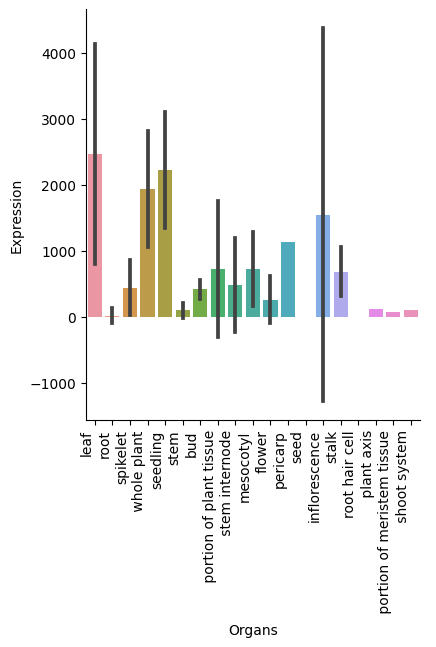

In [ ]:
#Plug in your data into the seaborn
df = pd.DataFrame({'Expression':expression, 'Organs':organs}) #The data is entered into a dataframe (google what it is if you are interested)

g = sns.catplot(data=df, kind="bar", x="Organs", y="Expression", ci="sd") #the dataframe is used to plot barplots, using standard deviation to indicate confidence interval
g.set_xticklabels(rotation=90)


<ipython-input-21-f4f839369b49>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  g = sns.catplot(data=df_sorted, kind="bar", x="Organs", y="Expression", ci="sd")


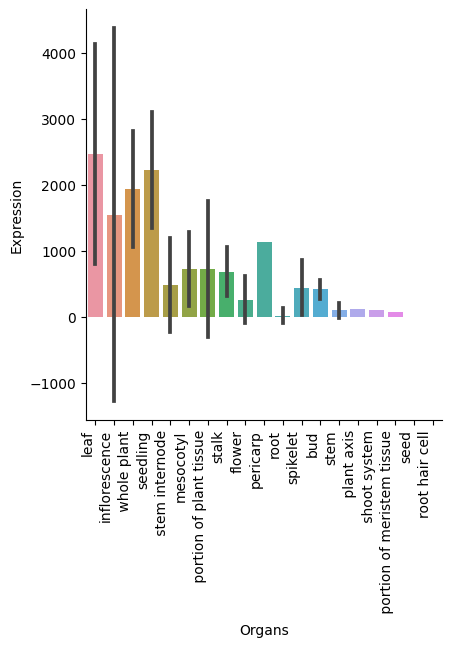

In [ ]:
df = pd.DataFrame({'Expression':expression, 'Organs':organs})

# sort the df in descending order
df_sorted = df.sort_values('Expression', ascending=False)

g = sns.catplot(data=df_sorted, kind="bar", x="Organs", y="Expression", ci="sd")
g.set_xticklabels(rotation=90)

In [ ]:
'''
rank 	 r-value 		           Gene ID 		         Description
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
0 	   0.9999999999999998 	 sobic.010g241000 	 component PsbO/OEC33 of PS-II oxygen-evolving center
1 	   0.9519118236005291 	 sobic.001g070500 	 component PsaF of PS-I complex
2 	   0.9489782347425428 	 sobic.003g052500 	 component PsaL of PS-I complex
3 	   0.9410374355399723 	 sobic.001g046900 	 component PsaD of PS-I complex
4 	   0.9267603709714294 	 sobic.002g338000 	 component LHCb4 of LHC-II complex
5 	   0.9248474815824904 	 sobic.001g177000 	 component LHCb1/2/3 of LHC-II complex
6 	   0.9244527507599423 	 sobic.002g119500 	 component PsaE of PS-I complex
7 	   0.9241187202283992 	 sobic.010g189300 	 component LHCa3 of LHC-I complex
8 	   0.9175248345175276 	 sobic.004g056900 	 component LHCa1 of LHC-I complex
9 	   0.9163754473147494 	 sobic.002g316700 	 subunit gamma of peripheral CF1 subcomplex of ATP synthase complex
10 	   0.913716188289522 	   sobic.004g235200 	 subunit delta of peripheral CF1 subcomplex of ATP synthase complex
11 	   0.9111432912417936 	 sobic.006g105900 	 glyceraldehyde 3-phosphate dehydrogenase (GAPDH)
12 	   0.9101750694879538 	 sobic.002g030200 	 component PsbP of PS-II oxygen-evolving center
13 	   0.9009240832813044 	 sobic.010g109500 	 regulatory factor (CURT) of thylakoid grana stacking
14 	   0.8993853599622608 	 sobic.009g130700 	 protein involved in PS-II assembly (Psb32)
15 	   0.8910910357792745 	 sobic.004g249800 	 regulatory factor (CURT) of thylakoid grana stacking
16 	   0.8853473422389058 	 sobic.009g143100 	 Rieske iron-sulfur component PetC of cytochrome b6/f complex
17 	   0.8849524461353403 	 sobic.007g223500 	 component NdhS of NDH electron donor-binding subcomplex E
18 	   0.8816829570526036 	 sobic.002g352100 	 component LHCa2 of LHC-I complex
19 	   0.8735484450274794 	 sobic.001g435500 	 component NF-YC of NF-Y transcription factor complex
20 	   0.8685323822863482 	 sobic.007g212400 	 Thylakoid lumenal 19 kDa protein, chloroplastic OS=Arabidopsis thaliana (sp|p82658|tl19_arath : 211.0)
21 	   0.8661864823544245 	 sobic.009g229700 	 component PsaH of PS-I complex
22 	   0.8637245315440595 	 sobic.001g417200 	 subunit b_ of membrane CF0 subcomplex of ATP synthase complex
23 	   0.8583298002058476 	 sobic.002g242000 	 component PsaG of PS-I complex
24 	   0.85832340318519 	   sobic.007g116700 	 plastidial alkenal/alkenone oxidoreductase (AOR)
25 	   0.8526984591034449 	 sobic.002g288300 	 component LHCb1/2/3 of LHC-II complex
26 	   0.8518056230588641 	 sobic.001g391900 	 scaffold protein NFU of plastidial SUF system transfer phase
27 	   0.8512803677216306 	 sobic.007g136900 	 component LHCa4 of LHC-I complex
28 	   0.8508927366654969 	 sobic.004g272600 	 Pentatricopeptide repeat-containing protein At1g31920 OS=Arabidopsis thaliana (sp|q9c6t2|ppr68_arath : 515.0)
29 	   0.8477833177851433 	 sobic.006g103400 	 protein disulfide isomerase (LQY1)
30 	   0.846271455109933 	   sobic.002g033900 	 component PsaK of PS-I complex
31 	   0.8453779257224031 	 sobic.001g338700 	 component NF-YB of NF-Y transcription factor complex
32 	   0.8418033617102266 	 sobic.004g211600 	 Protein TAB2 homolog, chloroplastic OS=Zea mays (sp|b4ftr7|atab2_maize : 558.0)
33 	   0.8409695893461517 	 sobic.006g073500 	 component PsaO of PS-I complex
34 	   0.8405878444857449 	 sobic.007g207800 	 PsbP domain-containing protein 3, chloroplastic OS=Arabidopsis thaliana (sp|q9s720|ppd3_arath : 221.0)
35 	   0.8401192478678284 	 sobic.008g053200 	 fructose-1,6-bisphosphate aldolase
36 	   0.8390308976638899 	 sobic.005g099700 	  no hits & (original description: none)
37 	   0.8341806446128524 	 sobic.001g382100 	 protein involved in PS-II assembly (Psb27)
38 	   0.8335904405337825 	 sobic.002g198600 	 component NdhL of NDH subcomplex A
39 	   0.8328549680797004 	 sobic.003g132100 	 catalytic component CRD1 of Mg-protoporphyrin IX monomethylester cyclase complex
40 	   0.8327980625317738 	 sobic.003g359100 	 sedoheptulose-1,7-bisphosphatase
41 	   0.8321839328100181 	 sobic.001g078000 	 component PetM/VII of cytochrome b6/f complex
42 	   0.8318523821160145 	 sobic.001g519800 	 glyceraldehyde 3-phosphate dehydrogenase (GAPDH)
43 	   0.8310842582076099 	 sobic.010g000500 	 plastocyanin electron carrier
44 	   0.828353434580677 	   sobic.001g295300 	 methionine S-enantiomer sulfoxide reductase (MsrA)
45 	   0.8243226054280792 	 sobic.009g091800 	 cofactor of plastid-encoded RNA polymerase (TAC16)
46 	   0.8241983813466057 	 sobic.007g071500 	 component PsbR of PS-II complex
47 	   0.8239948279747361 	 sobic.002g329600 	 component PsbQ of PS-II oxygen-evolving center
48 	   0.8200630608653953 	 sobic.005g087000 	 component LHCb5 of LHC-II complex
49 	   0.8196345416061427 	 sobic.002g297300 	 regulatory factor (CURT) of thylakoid grana stacking
50 	   0.8194990683814113 	 sobic.003g378600 	 component NdhN of NDH subcomplex A
'''

'\nrank \t r-value \t\t           Gene ID \t\t         Description\n-----------------------------------------------------------------------------------------------------------------------------------------------------------------------\n0 \t   0.9999999999999998 \t sobic.010g241000 \t component PsbO/OEC33 of PS-II oxygen-evolving center\n1 \t   0.9519118236005291 \t sobic.001g070500 \t component PsaF of PS-I complex\n2 \t   0.9489782347425428 \t sobic.003g052500 \t component PsaL of PS-I complex\n3 \t   0.9410374355399723 \t sobic.001g046900 \t component PsaD of PS-I complex\n4 \t   0.9267603709714294 \t sobic.002g338000 \t component LHCb4 of LHC-II complex\n5 \t   0.9248474815824904 \t sobic.001g177000 \t component LHCb1/2/3 of LHC-II complex\n6 \t   0.9244527507599423 \t sobic.002g119500 \t component PsaE of PS-I complex\n7 \t   0.9241187202283992 \t sobic.010g189300 \t component LHCa3 of LHC-I complex\n8 \t   0.9175248345175276 \t sobic.004g056900 \t component LHCa1 of LHC-I complex

#Week 13 - Project report

The end!
Now, write a short report discussing the project. There are 5 chapters.

Please write the report within this colab notebook and submit it to Marek. Please strictly follow the guidelines of the word limit. Penalties will be given for too short or too long reports.

**Description of your species** (~250 words)
* Evolutionary relationships (is it a monocot, eudicot, what are the relatives?)
* Uses (what is this plant used for?)
* Genome size, number of genes, ploidy (google this info)
* Anatomy (what kind of organs does it have?)

**Network analysis** (~250 words)
* How many genes did you identify from the mapman annotation? What major components of the photosystem did you identify and what is the function of these components?
* What was your strategy to identify the most connected gene?

**Co-expression list analysis** (~250 words)
* What are the functions of the top 50 co-expressed genes? 
* Does this fit with their role in photosynthesis?
* Did you find anything unexpected?

**Expression profile analysis** (~125 words)
* Expression plot interpretation. How is your gene expressed and how do you interpret this expression in terms of photosynthesis?

**Conclusion** (~125 words)
* Summarize the outcomes and impressions from the project


**Send your X_sample_annotation.txt file to Marek, where X is your group number!!!**

**Description of your species (249 words)**

Sorghum, a member of the Poaceae family, is a monocotyledonous plant in the order Poales. This genus consists of ~30 C4 species of flowering plants, with *Sorghum bicolor* being the most cultivated species, favored by countries such as Nigeria, the USA, Sudan, and Mexico. Sorghum is closely related to other important grasses, such as *Zea mays* (maize), *Oryza Sativa* (Asian rice), *Triticum aestivum* (common wheat), panicum (tropical grasses), and andropogon (beard grasses). 
 
Sorghum is a versatile crop with various uses, including as a source of food, livestock feed, and the production of alcoholic beverages and syrup. Sorghum is also a potential crop for lignocellulosic biofuel manufacture, as its juice is an excellent source of polysaccharides, producing pure ethanol via fermentation and distillation to make a sulphur-free biofuel as compared to petrol. 
 
The sorghum genome is diploid, with a chromosome number of 2n=20. The size of the sorghum genome is estimated to be between 700 million base pairs (Mbp) based on Cot analysis and 772 Mbp based on flow cytometry. The estimated number of genes in the sorghum genome is around 34,000-39,000. In terms of anatomy, sorghum has a fibrous root system for water and nutrient absorption, a hollow and cylindrical stem for structural support and water transport, and long, narrow leaves arranged alternately. The inflorescence of sorghum contains many individual flowers, each of which has both male and female reproductive structures. The small, oval-shaped seed of sorghum has a hard coat that protects its inner embryo. 

**Network Analysis (250 words)**

We identified 321 genes from the mapman annotation. Proteins such as PsbB and PsbI are involved in catalysing the conversion of chemical energy at the reaction centre, which is critical to the photosystem core complex. Hence a significant number of proteins is identified in assisting its assembly and stabilising it via interaction with the antenna complex. Some components associated with antenna complexes interact to form the main light-harvesting complex in the photosystem which aids in transferring light to the reaction centres. Genes associated with NDH were also identified which helped maintain the proton gradient across the thylakoid membrane.


We did pairwise comparisons on genes identified and calculated r values to determine association levels. A 0.91 cut-off gave a ‘network’ list of 158 co-expressed gene pairs. A warning input was shown as there are frequent constant values detected in the database, which results in the absence of variance in a few of the Pearson values. Each gene from ‘network’ is being looped through and cross-checked with the ‘degrees’ dictionary. The number of nodes the gene is identified with is tallied and the gene is added as a key-value pair in the dictionary with its frequency. The program initialises ‘highest_key’ and ‘highest_value’ to empty string and float respectively. It loops through each key-pair value and compares it against the current ‘highest_value’. If the current value is greater than the ‘highest_value’, the ‘highest_key’ and ‘highest_value’ are updated with the current pair. The gene with the highest value is the most connected gene.


**Co-expression list analysis (246 words)**

Most co-expressed genes code for proteins involved in formation of photosystem II and I components and complexes for non-cyclic photophosphorylation of photosynthesis.
Genes 9, 10 and 22 code for different ATP synthase domains, important for photophosphorylation and ATP synthesis.
Genes 11, 35 and 40 code for Calvin cycle enzymes. The high co-expression hints the close connection with light-dependent reaction, exchanging NADP with NADPH from photophosphorylation. The high level of co-expression is required to ensure Calvin cycle is not limiting rate of photosynthesis.
Genes 13, 15 and 49 code for membrane bending proteins, creating grana stacks that increase the surface area for photosystems to carry out light-dependent reactions.
Genes 16, 17, 26, 38, 41, 43 are components of the electron transport chain complexes, for the active transport of protons. This generates the proton gradient needed for photophosphorylation.

Genes 24 and 44 help to protect against oxidative stress and chloroplast damage, while 20 codes for a regulatory protein in photosystem repair. These counter the high rate of destructive oxygen reactive species formation from oxygen and photons accumulating in photosynthesizing chloroplasts.
Gene 45 codes for RNA polymerase transcibing chloroplast genome, 30 codes for nuclear factor subunits forming transcriptional complexes, 28 is involved in post-transcriptional regulation. 
Gene 29 codes for regulatory proteins modifying disulfide bonds of chloroplast signalling proteins, regulating activity within the chloroplast.

Unexpectedly, there are 2 separate genes coding for glyceraldehyde 3-phosphate dehydrogenase, which may be due to being at different stages of photosynthesis (glycolysis and Calvin cycle).

**Expression profile analysis (120 words)**

Our gene is mostly expressed in the leaves (most photosynthesis takes place), seedling (takes over after seed leaf is depleted) then the influorescence (partially offsets initial cost of flowering). High variation in the leaves and inflorescence may be due to breeding efforts to create more stalks and less inflorescence for juice/paper/fertilizer/biomass production, or vice versa for flour/animal feed production through increasing photosynthesis.

The gene is also expressed in the pericarp, but not in the seed itself.  This suggests that the pericarp is photosynthetically active and is responsible for providing the necessary energy needed for embryo development and subsequent germination.  Since the incoming light is mostly absorbed in the pericarp, embryonic photosynthesis in the seed is limited.







**Conclusion (123 words)**

Overall, despite the high variance in the expression due to the variety of sorghum from years of cultivation and its role in providing feedstock and bioenergy, the gene expressions involved in photosynthesis, especially genes involved in photosystems, are still conserved.  The co-expression analysis revealed their close functional relationships, suggesting their coordinated regulation for optimal photosynthesis through light harvesting, energy conversion, and protection against oxidative stress. 

The tissue-specific expression of the gene of interest suggests the importance of leaf, seedling, and inflorescence development in Sorghum bicolor, with implications for crop improvement.  Overall, these findings enhance our understanding of photosynthesis and provide a foundation for further research to optimize production of sorghum bicolor and address global challenges such as food security and climate change.
